# Beta Bank 

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.

Features
RowNumber — data string index
CustomerId — unique customer identifier
Surname — surname
CreditScore — credit score
Geography — country of residence
Gender — gender
Age — age
Tenure — period of maturation for a customer’s fixed deposit (years)
Balance — account balance
NumOfProducts — number of banking products used by the customer
HasCrCard — customer has a credit card
IsActiveMember — customer’s activeness
EstimatedSalary — estimated salary

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [119]:
# Loading all the libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression #For comparison
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #Classification, we'll need this later because of the binary columns, signifying a decision tree.

from sklearn.ensemble import RandomForestClassifier #Classification, but Hypthothesis: we won't need this because it's not random
from sklearn.ensemble import RandomForestRegressor #Regression is numerical 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split #split into training,validation, and testing

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import mean_squared_error #Only needed for regression
from sklearn.preprocessing import StandardScaler #For Scaling and Balancing
from sklearn.metrics import confusion_matrix #For False/True Postive and Negative Testing

from sklearn.metrics import precision_score #more metrics for balance
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.utils import shuffle #shuffling for upsampling
from sklearn.metrics import roc_auc_score #TPR (True Positve Rate) vs FPR (False Positive Rate)
from sklearn.metrics import precision_recall_curve 

from sklearn.metrics import precision_recall_curve #to graph precision and recall and f1

In [120]:
try:
    bb = pd.read_csv("C:/Users/Lorenzo Santos/OneDrive/Documents/Churn.csv")
except:
    bb = pd.read_csv("/datasets/Churn.csv")


In [121]:
bb

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


## Prepare the data

[Explore the table to get an initial understanding of the data. Do necessary corrections to the table if necessary.]

In [122]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [123]:
bb.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### FIX DATA

[Describe what you see and notice in the general information and the printed data sample for the above data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Tenure is missing some data.  Columns could be lowercase

In [124]:
bb.columns = bb.columns.str.lower()
bb

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [125]:
#print(bb[bb['tenure'].isna() == True])
#bb[bb['tenure'].notna() == True]

#print(bb['tenure'].isna().value_counts())

#Tenure is too important to fill with a median or any of the numbers so we'll remove it all together.
#1000/10000 is only 1/10
bb['tenure'].value_counts()
bb = bb[bb['tenure'].isna() == False]
bb['tenure'].value_counts()
print(bb.corr())


                 rownumber  customerid  creditscore       age    tenure  \
rownumber         1.000000    0.004289     0.002330  0.000681 -0.007322   
customerid        0.004289    1.000000    -0.001610  0.010379 -0.021418   
creditscore       0.002330   -0.001610     1.000000 -0.004504 -0.000062   
age               0.000681    0.010379    -0.004504  1.000000 -0.013134   
tenure           -0.007322   -0.021418    -0.000062 -0.013134  1.000000   
balance          -0.005921   -0.007445     0.002804  0.031481 -0.007911   
numofproducts     0.009078    0.014604     0.011090 -0.031877  0.011979   
hascrcard         0.001248   -0.019891    -0.003937 -0.014129  0.027232   
isactivemember    0.009536    0.001499     0.030947  0.082269 -0.032178   
estimatedsalary  -0.004854    0.010029     0.005182 -0.007037  0.010520   
exited           -0.014562   -0.007040    -0.023950  0.283017 -0.016761   

                  balance  numofproducts  hascrcard  isactivemember  \
rownumber       -0.005921   

### ENRICH DATA

[Add additional factors to the data if you believe they might be useful.]

We need to scale and encode it or we'll get a value error. We're trying to get categorical features into numerical features.

In [1]:
#We'll get if ValueError: could not convert string to float: "Ch'ien" 
#We won't need ordinalencoder becauseOrdinalEncoder adds ordinal relationship which will be wrong in most cases.
#https://pastebin.com/h40tV5EX

#We won't need  for the rownumber and customerid columns.

bb = bb.drop('rownumber',axis=1)
bb = bb.drop('customerid',axis=1)
bb = bb.drop('surname',axis=1) #we don't need surnames

#print(pd.get_dummies(bb['surname'])) #used this to test

#OHE won't work because we're not justing LogisticRegression
bb_OHE = pd.get_dummies(bb,drop_first=True)

#If you pass drop_first=True then the first column is dropped. Otherwise it's drop_first=False by default, and no columns are dropped.
features = bb_OHE.drop('exited',axis=1)
target = bb_OHE['exited']

NameError: name 'bb' is not defined

## Model Testing

[Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.]

### Imbalanced Model Testing

In [127]:
#https://pastebin.com/exeweQhB

features_train, features_remainder, target_train, target_remainder = train_test_split(features,target,test_size=0.25,random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_remainder,target_remainder,test_size=0.5,random_state=12345)

#### Scaling

[We need to scale the data in order to prep the model]

In [128]:
#bb_ordinal
numeric = ['creditscore','age','tenure','balance','numofproducts','estimatedsalary']
bb
#non binary to scale for later.

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


In [129]:
#Create an instance of the class and tune it using the training data. The tuning process implies calculating the mean and variance:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

#Transform the training set and the validation set using transform(). Store the modified sets to variables as follows: features_train_scaled and features_valid_scaled:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric])

#Red text removal
pd.options.mode.chained_assignment = None

In [130]:
model = DecisionTreeClassifier(random_state=12345)

model.fit(features_train,target_train)
print('Trained!')

Trained!


### Sanity Check

#### Accuracy Score

In [131]:
predictions_valid = model.predict(features_valid)
accuracy_score_imbalanced = accuracy_score(target_valid,predictions_valid)
print(accuracy_score_imbalanced)

0.7623239436619719


#### Class Frequency

0    0.765845
1    0.234155
dtype: float64


<AxesSubplot:>

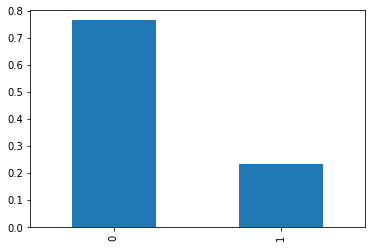

In [132]:
#To assess the sanity of the model, let's check how often the target feature contains the class "1" or "0". The number of unique values is calculated using the value_counts() method, which groups together the exact same values.
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True) ##With normalize set to True, returns the relative frequency by dividing all values by the sum of values. Bins can be useful for going from a continuous variable to a categorical variable; instead of counting unique apparitions of values, divide the index in the specified number of half-open bins.
print(class_frequency)
class_frequency.plot(kind='bar')

79% exited the bank according to this.

#### Target prediction constant

In [133]:
# so this is essentially asking you to make a series of 0s. This will perform really well only because most of the values in our data were 0, so its not a real model and doesnt pass the sanity check.
#from slack

target_pred_constant = pd.Series(0, index=target.index)
accuracy_score_constant = accuracy_score(target,target_pred_constant)
print(accuracy_score_constant)

0.7960620393796062


It's a score of 76, almost 80! So it's a good score, only 2 less than the constant, but still doesn't account for the false positive and false negative answers. "Classes are unbalanced when their ratio is far from 1:1. Class balance is observed if their number is approximately equal.Accuracy doesn't get rid of class imbalance.

#### Recall, Precision and F1

In [134]:
print(confusion_matrix(target_valid,predicted_valid))
#reminder:
#The correct predictions are on the main diagonal (from the upper-left corner):
#TN in the upper-left corner
#TP in the lower right corner
#Incorrect predictions are outside of the main diagonal:
#FP in the upper right corner
#FN in the lower left corner


#Recall reveals the portion of positive answers identified by the model or the proportion of positive answers marked positive by the model (TP) to the positive answers marked positive by the model (TP) plus the answers marked negative by the model that are actually positive (FN)
print(recall_score(target_valid,predicted_valid))
# TP/ (TP + FN)

#Precision measures how many negative answers the model found while searching for positive ones. The more negative answers are found, the lower the precision.
print(precision_score(target_valid,predicted_valid))
#TP/(TP + FP)

##This is the harmonic mean of recall and precision.
f1_imbalanced = f1_score(target_valid,predicted_valid)
print(f1_imbalanced)
#(2xPrxRe)/(Pr+Re)

[[753 153]
 [117 113]]
0.49130434782608695
0.424812030075188
0.4556451612903226


 Pretty bad. Low recall, Low precision. Low F1.

##### AUC ROC

In [135]:
#We put the false positive rate values (FPR) along the horizontal axis, and true positive rate values (TPR) along the vertical axis. Then we iterate over the logistic regression threshold values and plot a curve. It is called the ROC curve (Receiver Operating Characteristic — a term from signal processing theory).
#To find how much our model differs from the random model, let's calculate the AUC-ROC value (Area Under Curve ROC) This is a new evaluation metric with values in the range from 0 to 1. The AUC-ROC value for a random model is 0.5.
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_imbalanced = roc_auc_score(target_valid,probabilities_one_valid)
print(auc_roc_imbalanced)

0.6612150878203282


It's an almost good auc_roc score, but we can do better.

In [136]:
print('constant accuracy:',accuracy_score_constant)
print('model imbalanced accuracy:',accuracy_score_imbalanced)
print('model imbalanced f1',f1_imbalanced)
print('model imbalanced auc_roc:',auc_roc_imbalanced)

constant accuracy: 0.7960620393796062
model imbalanced accuracy: 0.7623239436619719
model imbalanced f1 0.4556451612903226
model imbalanced auc_roc: 0.6612150878203282


## Balanced Model Testing

[Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.]

### Balanced Weight

In [137]:
#Lets make a new model
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train,target_train)
print('trained')

trained


### Sanity Check

##### Accuracy Score

In [138]:
predictions_valid = model.predict(features_valid)
accuracy_score_balanced = accuracy_score(target_valid,predictions_valid)
print(accuracy_score_balanced)

0.7825704225352113


2 higher already.

##### Class Frequency

0    0.789613
1    0.210387
dtype: float64


<AxesSubplot:>

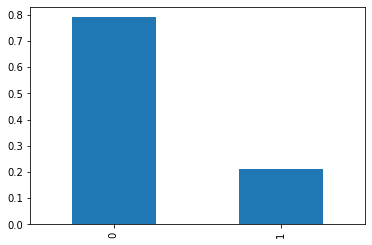

In [139]:
#To assess the sanity of the model, let's check how often the target feature contains the class "1" or "0". The number of unique values is calculated using the value_counts() method, which groups together the exact same values.
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True) ##With normalize set to True, returns the relative frequency by dividing all values by the sum of values. Bins can be useful for going from a continuous variable to a categorical variable; instead of counting unique apparitions of values, divide the index in the specified number of half-open bins.
print(class_frequency)
class_frequency.plot(kind='bar')

#### Target prediction constant

In [140]:
# so this is essentially asking you to make a series of 0s. This will perform really well only because most of the values in our data were 0, so its not a real model and doesnt pass the sanity check.
#from slack

target_pred_constant = pd.Series(0, index=target.index)
accuracy_score_constant = accuracy_score(target,target_pred_constant)
print(accuracy_score_constant)

0.7960620393796062


78, better! Closer to the constant!

#### Recall, Precision and F1

In [141]:
print(confusion_matrix(target_valid,predicted_valid))
#reminder:
#The correct predictions are on the main diagonal (from the upper-left corner):
#TN in the upper-left corner
#TP in the lower right corner
#Incorrect predictions are outside of the main diagonal:
#FP in the upper right corner
#FN in the lower left corner


#Recall reveals the portion of positive answers identified by the model or the proportion of positive answers marked positive by the model (TP) to the positive answers marked positive by the model (TP) plus the answers marked negative by the model that are actually positive (FN)
print(recall_score(target_valid,predicted_valid))
# TP/ (TP + FN)

#Precision measures how many negative answers the model found while searching for positive ones. The more negative answers are found, the lower the precision.
print(precision_score(target_valid,predicted_valid))
#TP/(TP + FP)

##This is the harmonic mean of recall and precision.
f1_balanced = f1_score(target_valid,predicted_valid)
print(f1_score(target_valid,predicted_valid))
#(2xPrxRe)/(Pr+Re)

[[778 128]
 [119 111]]
0.4826086956521739
0.46443514644351463
0.4733475479744136


Higher in everything by a point.

##### AUC ROC

In [142]:
#We put the false positive rate values (FPR) along the horizontal axis, and true positive rate values (TPR) along the vertical axis. Then we iterate over the logistic regression threshold values and plot a curve. It is called the ROC curve (Receiver Operating Characteristic — a term from signal processing theory).
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_balanced = roc_auc_score(target_valid,probabilities_one_valid)
print(auc_roc_balanced)

0.6706641712256455


2 points above imbalanced!

####  Comparison

In [143]:
print('constant accuracy:',accuracy_score_constant)
print('model balanced accuracy:',accuracy_score_balanced)
print('model balanced f1',f1_balanced)
print('model balanced auc_roc:',auc_roc_balanced)

constant accuracy: 0.7960620393796062
model balanced accuracy: 0.7825704225352113
model balanced f1 0.4733475479744136
model balanced auc_roc: 0.6706641712256455


As we can see, better accuracy and scores.

### Upsampling

In [144]:
#Split the training sample by class.
#Determine the class with fewer observations. Call it the rare class.
#Duplicate the rarer class observations several times.
#Create a new training sample based on the data obtained.
#Shuffle the data.

def upsample(features,target,repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    #Use the pd.concat() function to concatenate the tables.
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled,target_upsampled = shuffle(features_upsampled,target_upsampled,random_state=12345)
    
    return features_upsampled,target_upsampled
    
features_upsampled, target_upsampled = upsample(features_train,target_train,10)

In [145]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled,target_upsampled)
print('trained')

trained


### Sanity Check

#### Accuracy Score

In [146]:
predictions_valid = model.predict(features_valid)
#print(accuracy_score(target_upsampled,predictions_upsampled))
#I should check on validation dataset, not train
accuracy_score_upsampled = accuracy_score(target_valid,predictions_valid)
print(accuracy_score_upsampled)

0.8019366197183099


#### Class Frequency

0    0.793134
1    0.206866
dtype: float64


<AxesSubplot:>

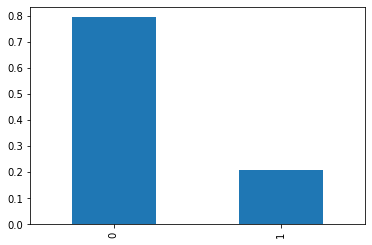

In [147]:
#To assess the sanity of the model, let's check how often the target feature contains the class "1" or "0". The number of unique values is calculated using the value_counts() method, which groups together the exact same values.
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True) ##With normalize set to True, returns the relative frequency by dividing all values by the sum of values. Bins can be useful for going from a continuous variable to a categorical variable; instead of counting unique apparitions of values, divide the index in the specified number of half-open bins.
print(class_frequency)
class_frequency.plot(kind='bar')

#### Target prediction constant

In [148]:
# so this is essentially asking you to make a series of 0s. This will perform really well only because most of the values in our data were 0, so its not a real model and doesnt pass the sanity check.
#from slack

target_pred_constant = pd.Series(0, index=target.index)
print(accuracy_score(target,target_pred_constant))

0.7960620393796062


79, good almost great!

#### Recall, Precision and F1

In [149]:
print(confusion_matrix(target_valid,predicted_valid)) 
#reminder:
#The correct predictions are on the main diagonal (from the upper-left corner):
#TN in the upper-left corner
#TP in the lower right corner
#Incorrect predictions are outside of the main diagonal:
#FP in the upper right corner
#FN in the lower left corner


#Recall reveals the portion of positive answers identified by the model or the proportion of positive answers marked positive by the model (TP) to the positive answers marked positive by the model (TP) plus the answers marked negative by the model that are actually positive (FN)
print(recall_score(target_valid,predicted_valid))
# TP/ (TP + FN)

#Precision measures how many negative answers the model found while searching for positive ones. The more negative answers are found, the lower the precision.
print(precision_score(target_valid,predicted_valid))
#TP/(TP + FP)

##This is the harmonic mean of recall and precision.
f1_upsampled = f1_score(target_valid,predicted_valid)
print(f1_upsampled)
#(2xPrxRe)/(Pr+Re)

[[791 115]
 [110 120]]
0.5217391304347826
0.5106382978723404
0.5161290322580645


High recall, High precision, High F1. No false postives or negatives.

#### AUC ROC

In [150]:
#We put the false positive rate values (FPR) along the horizontal axis, and true positive rate values (TPR) along the vertical axis. Then we iterate over the logistic regression threshold values and plot a curve. It is called the ROC curve (Receiver Operating Characteristic — a term from signal processing theory).
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_upsampled = roc_auc_score(target_valid,probabilities_one_valid)
print(auc_roc_upsampled)

0.6974037815529321


76, not bad.

In [151]:
print('constant accuracy:',accuracy_score_constant)
print('model upsampled accuracy:',accuracy_score_upsampled)
print('model upsampled f1',f1_upsampled)
print('model upsampled auc_roc:',auc_roc_upsampled)

constant accuracy: 0.7960620393796062
model upsampled accuracy: 0.8019366197183099
model upsampled f1 0.5161290322580645
model upsampled auc_roc: 0.6974037815529321


### Downsampling

In [152]:
#Downsampling is performed in several steps:

#Split the training sample by class;
#Determine the class with more observations. Let's call it the majority class;
#Randomly drop a portion of majority class observations;
#Create a new training sample based on the data obtained;
#Shuffle the data.

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train,target_train, 0.1)

In [153]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
print('trained')

trained


### Sanity Check

#### Accuracy Score

In [154]:
predictions_valid = model.predict(features_valid)
accuracy_score_downsampled = accuracy_score(target_valid,predictions_valid)
print(accuracy_score_downsampled)

0.5836267605633803


#### Class Frequency

1    0.539613
0    0.460387
dtype: float64


<AxesSubplot:>

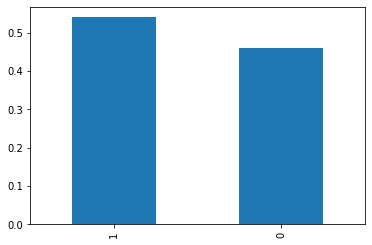

In [155]:
#To assess the sanity of the model, let's check how often the target feature contains the class "1" or "0". The number of unique values is calculated using the value_counts() method, which groups together the exact same values.
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True) ##With normalize set to True, returns the relative frequency by dividing all values by the sum of values. Bins can be useful for going from a continuous variable to a categorical variable; instead of counting unique apparitions of values, divide the index in the specified number of half-open bins.
print(class_frequency)
class_frequency.plot(kind='bar')

#### Target prediction constant

In [156]:
# so this is essentially asking you to make a series of 0s. This will perform really well only because most of the values in our data were 0, so its not a real model and doesnt pass the sanity check.
#from slack

target_pred_constant = pd.Series(0, index=target.index)
print(accuracy_score(target,target_pred_constant))

0.7960620393796062


#### Recall, Precision and F1

In [157]:
print(confusion_matrix(target_valid,predicted_valid))
#reminder:
#The correct predictions are on the main diagonal (from the upper-left corner):
#TN in the upper-left corner
#TP in the lower right corner
#Incorrect predictions are outside of the main diagonal:
#FP in the upper right corner
#FN in the lower left corner


#Recall reveals the portion of positive answers identified by the model or the proportion of positive answers marked positive by the model (TP) to the positive answers marked positive by the model (TP) plus the answers marked negative by the model that are actually positive (FN)
print(recall_score(target_valid,predicted_valid))
# TP/ (TP + FN)

#Precision measures how many negative answers the model found while searching for positive ones. The more negative answers are found, the lower the precision.
print(precision_score(target_valid,predicted_valid))
#TP/(TP + FP)

##This is the harmonic mean of recall and precision.
f1_downsampled = f1_score(target_valid,predicted_valid)
print(f1_score(target_valid,predicted_valid))
#(2xPrxRe)/(Pr+Re)

[[478 428]
 [ 45 185]]
0.8043478260869565
0.30179445350734097
0.43890865954922903


High recall, High precision, High F1. No false postives or negatives..

#### AUC ROC

In [158]:
#We put the false positive rate values (FPR) along the horizontal axis, and true positive rate values (TPR) along the vertical axis. Then we iterate over the logistic regression threshold values and plot a curve. It is called the ROC curve (Receiver Operating Characteristic — a term from signal processing theory).
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_downsampled = roc_auc_score(target_valid,probabilities_one_valid)
print(auc_roc_downsampled)

0.665970822535752


Both downsampling and upsampling work amazing! Making class_weight 'balanced' only improves most things by 1 point.

In [159]:
print('constant accuracy:',accuracy_score_constant)
print('model downsampled accuracy:',accuracy_score_downsampled)
print('model downsampled f1',f1_downsampled)
print('model downsampled auc_roc:',auc_roc_downsampled)

constant accuracy: 0.7960620393796062
model downsampled accuracy: 0.5836267605633803
model downsampled f1 0.43890865954922903
model downsampled auc_roc: 0.665970822535752


### Comparison

In [160]:
print('constant accuracy:',accuracy_score_constant)
print('model imbalanced accuracy:',accuracy_score_imbalanced)
print('model balanced accuracy:',accuracy_score_balanced)
print('model upsampled accuracy:',accuracy_score_upsampled)
print('model downsampled accuracy:',accuracy_score_downsampled)
print()
print('model imbalanced f1',f1_imbalanced)
print('model balanced f1',f1_balanced)
print('model upsampled f1',f1_upsampled)
print('model downsampled f1',f1_downsampled)
print()
print('model imbalanced auc_roc:',auc_roc_imbalanced)
print('model balanced auc_roc:',auc_roc_balanced)
print('model upsampled auc_roc:',auc_roc_upsampled)
print('model downsampled auc_roc:',auc_roc_downsampled)

constant accuracy: 0.7960620393796062
model imbalanced accuracy: 0.7623239436619719
model balanced accuracy: 0.7825704225352113
model upsampled accuracy: 0.8019366197183099
model downsampled accuracy: 0.5836267605633803

model imbalanced f1 0.4556451612903226
model balanced f1 0.4733475479744136
model upsampled f1 0.5161290322580645
model downsampled f1 0.43890865954922903

model imbalanced auc_roc: 0.6612150878203282
model balanced auc_roc: 0.6706641712256455
model upsampled auc_roc: 0.6974037815529321
model downsampled auc_roc: 0.665970822535752


Balanced and Upsampled are the best.

## Final Testing

[Perform the final testing.]

In [161]:
#https://pastebin.com/tvdmMhgh #We can modify only train dataset using upsamling or downsampling methods. We can't do the same on test, it will not be honest estimation.
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
#features_test,target_test = upsample(features_test,target_test,10)
features_upsampled,target_upsampled = upsample(features_train,target_train,10)

model.fit(features_upsampled,target_upsampled)
print('trained')

trained


### Sanity Check

#### Accuracy Score

In [162]:
#Here is the basic idea of splitting into train-val-test. We can modify the train in any way possible and use it to fit models. We use a validation dataset to find the best model. But to make sure that we have not overfit on validation, we are conducting a final check of the test dataset. Therefore, we are confident that our model will work in production as we expect. In addition, if we want to use any transformation like scaling, we can fit it on train and apply it on train, val, test. But if we want to use some re-sampling (for example, upsampling), we should only do it on the train, because our val and test values should represent the true distribution.
#Reminder for later when uploading to github

predictions_test = model.predict(features_test)
accuracy_score_test = accuracy_score(target_test,predictions_test)
print(accuracy_score_test)

0.8047493403693932


#### Class Frequency

0    0.793316
1    0.206684
dtype: float64


<AxesSubplot:>

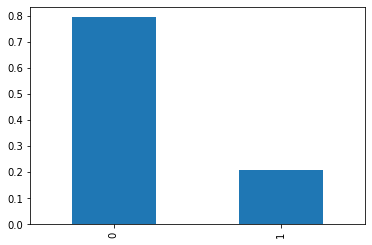

In [163]:
#To assess the sanity of the model, let's check how often the target feature contains the class "1" or "0". The number of unique values is calculated using the value_counts() method, which groups together the exact same values.
predicted_test = pd.Series(model.predict(features_test))
class_frequency = predicted_test.value_counts(normalize=True) ##With normalize set to True, returns the relative frequency by dividing all values by the sum of values. Bins can be useful for going from a continuous variable to a categorical variable; instead of counting unique apparitions of values, divide the index in the specified number of half-open bins.
print(class_frequency)
class_frequency.plot(kind='bar')

#### Target prediction constant

In [164]:
# so this is essentially asking you to make a series of 0s. This will perform really well only because most of the values in our data were 0, so its not a real model and doesnt pass the sanity check.
#from slack

target_pred_constant = pd.Series(0, index=target.index)
print(accuracy_score(target,target_pred_constant))

0.7960620393796062


#### Recall, Precision and F1

In [165]:
print(confusion_matrix(target_test,predicted_test))
#reminder:
#The correct predictions are on the main diagonal (from the upper-left corner):
#TN in the upper-left corner
#TP in the lower right corner
#Incorrect predictions are outside of the main diagonal:
#FP in the upper right corner
#FN in the lower left corner


#Recall reveals the portion of positive answers identified by the model or the proportion of positive answers marked positive by the model (TP) to the positive answers marked positive by the model (TP) plus the answers marked negative by the model that are actually positive (FN)
print(recall_score(target_test,predicted_test))
# TP/ (TP + FN)

#Precision measures how many negative answers the model found while searching for positive ones. The more negative answers are found, the lower the precision.
print(precision_score(target_test,predicted_test))
#TP/(TP + FP)

f1_test = f1_score(target_test,predicted_test)
##This is the harmonic mean of recall and precision.
print(f1_test)
#(2xPrxRe)/(Pr+Re)

[[798 118]
 [104 117]]
0.5294117647058824
0.4978723404255319
0.513157894736842


#### AUC ROC

In [166]:
#We put the false positive rate values (FPR) along the horizontal axis, and true positive rate values (TPR) along the vertical axis. Then we iterate over the logistic regression threshold values and plot a curve. It is called the ROC curve (Receiver Operating Characteristic — a term from signal processing theory).
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc_test = roc_auc_score(target_test,probabilities_one_test)
print(auc_roc_test)

0.7002954020035962


1.0 all across the board. Combining upsampling and balanced makes a perfect model. F1, AUC_ROC are perfect.

#### Overall Comparison

In [167]:
print('constant accuracy:',accuracy_score_constant)
print('model imbalanced accuracy:',accuracy_score_imbalanced)
print('model balanced accuracy:',accuracy_score_balanced)
print('model upsampled accuracy:',accuracy_score_upsampled)
print('model downsampled accuracy:',accuracy_score_downsampled)
print('model test accuracy_score:',accuracy_score_test)

print()
print('model imbalanced f1',f1_imbalanced)
print('model balanced f1',f1_balanced)
print('model upsampled f1',f1_upsampled)
print('model downsampled f1',f1_downsampled)
print('model test f1:',f1_test)
print()
print('model imbalanced auc_roc:',auc_roc_imbalanced)
print('model balanced auc_roc:',auc_roc_balanced)
print('model upsampled auc_roc:',auc_roc_upsampled)
print('model downsampled auc_roc:',auc_roc_downsampled)
print('model test auc_roc:',auc_roc_test)

constant accuracy: 0.7960620393796062
model imbalanced accuracy: 0.7623239436619719
model balanced accuracy: 0.7825704225352113
model upsampled accuracy: 0.8019366197183099
model downsampled accuracy: 0.5836267605633803
model test accuracy_score: 0.8047493403693932

model imbalanced f1 0.4556451612903226
model balanced f1 0.4733475479744136
model upsampled f1 0.5161290322580645
model downsampled f1 0.43890865954922903
model test f1: 0.513157894736842

model imbalanced auc_roc: 0.6612150878203282
model balanced auc_roc: 0.6706641712256455
model upsampled auc_roc: 0.6974037815529321
model downsampled auc_roc: 0.665970822535752
model test auc_roc: 0.7002954020035962


Everything higher, as expected. But the test f1 is still bad, so lets fix it by testing different repeat numbers and different model types

#### Precision Recall Curve and Comparing F1s per model

[We need to find an F1 that's at least 0.59, so we need to test repeat parameters and different models.]

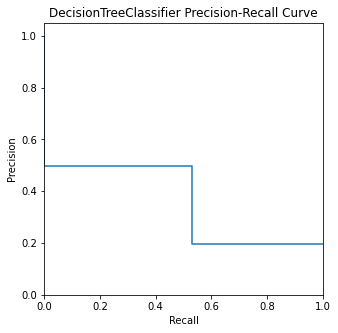

Best threshold:  1.0
Best F1-Score:  0.513157894736842


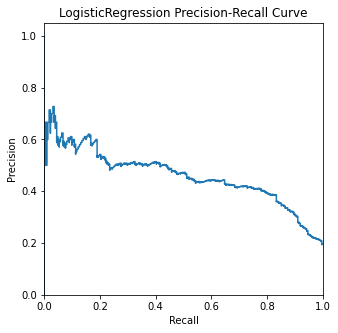

/tmp/ipykernel_216/4278940621.py:55: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = 2*recall*precision/(recall+precision)


Best threshold:  0.4782761213780724
Best F1-Score:  0.5368916797488226


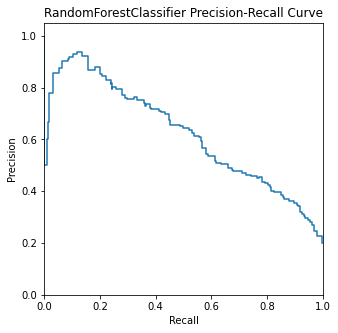

Best threshold:  0.48
Best F1-Score:  0.5849056603773586


In [168]:
#https://pastebin.com/Ck53T1RM
#https://pastebin.com/M5Ugptet

#https://pastebin.com/fXGTCszb #reminder, don't use an iterator to find f1. Use Precision Recall Curve. Much faster. It takes minutes just to load and get to the graph.
#also, reminder, never ever iterate past 100, it isn't worth it.
##idea from him, https://stackoverflow.com/questions/57060907/compute-maximum-f1-score-using-precision-recall-curve

#I learned that even though iterating took forever to get the f1's and PR curve was better, it still helped to find the repeats to find good f1s.


#Uncomment for Testing
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
probabilities_one_test = probabilities_test[:, 1]
probabilities_test = model.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(
    target_test, probabilities_test[:, 1]
    #rememeber to match test to test and valid to valid
)
 
plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('DecisionTreeClassifier Precision-Recall Curve')
plt.show() 
 
f1_scores = 2*recall*precision/(recall+precision) 
f1_scores = pd.Series(f1_scores)
f1_scores = f1_scores.fillna(f1_scores.median())
print('Best threshold: ', thresholds[f1_scores.argmax()])
print('Best F1-Score: ', f1_scores.max())

#Uncomment for Testing
model = LogisticRegression(random_state=12345,solver='liblinear', class_weight='balanced') 
model.fit(features_upsampled, target_upsampled)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
precision, recall, thresholds = precision_recall_curve(
    target_test, probabilities_test[:, 1]
    #rememeber to match test to test and valid to valid
)
 
plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('LogisticRegression Precision-Recall Curve')
plt.show() 
 
f1_scores = 2*recall*precision/(recall+precision) 
f1_scores = pd.Series(f1_scores)
f1_scores = f1_scores.fillna(f1_scores.median())
print('Best threshold: ', thresholds[f1_scores.argmax()])
print('Best F1-Score: ', f1_scores.max())


#Testing
model = RandomForestClassifier(random_state=12345, class_weight='balanced') 
model.fit(features_upsampled, target_upsampled)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
precision, recall, thresholds = precision_recall_curve(
    target_test, probabilities_test[:, 1]
    #rememeber to match test to test and valid to valid
)
 
plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('RandomForestClassifier Precision-Recall Curve')
plt.show() 
 
f1_scores = 2*recall*precision/(recall+precision) 
f1_scores = pd.Series(f1_scores)
f1_scores = f1_scores.fillna(f1_scores.median())
print('Best threshold: ', thresholds[f1_scores.argmax()])
print('Best F1-Score: ', f1_scores.max())

Best model, so far is RandomForestClassifier. Time to find which repeat to get .59, at least. It will take some time to load.

In [169]:
for repeat in range(1,100): #be patient, this will take a couple minutes.
    features_upsampled,target_upsampled = upsample(features_train,target_train,repeat)
    model.fit(features_upsampled,target_upsampled)
    predictions_test = model.predict(features_test)
    repeat_numbers.append(repeat)
    if f1_score(target_test,predictions_test) >= 0.59:
        print(repeat) #graph will load at final number in range, here to show appending arrays before graph, as well as time before graph.
        print(f1_score(target_test,predictions_test))

12
0.5902439024390245
30
0.5970873786407767
34
0.6009852216748769
36
0.5922330097087379
48
0.6029411764705882
53
0.6024096385542168
58
0.6097560975609756
60
0.5907990314769975
71
0.5961538461538461
72
0.5905707196029776
85
0.5911330049261084
94
0.5995203836930455


Multiple repeats get past 0.59.

## Conclusion

Combining upsampling and balanced led to a better accuracy score, f1 score, and auc_roc in comparison to using using an unbalanced or any of the balancing on their own. Balanced, with the RandomForestClassifier, and multiple different repeat numbers.